In [39]:
# ! pip install openai

In [41]:
# ! which pip

In [338]:
import pandas as pd
from glob import glob
import os
import openai
from tqdm import tqdm
from statistics import mean
import warnings

tqdm.pandas()

PATH = "/home/nikolay/wspace/AutoTMDatasets/MARKUP/archive/TOLOKA_Markup"

In [9]:
dfs = [pd.read_csv(fpath, sep='\t') for fpath in glob(os.path.join(PATH, "*.tsv"))]
df = pd.concat(dfs)

In [15]:
df['INPUT:model_id'].unique().shape

(405,)

In [17]:
df[['INPUT:model_id', 'INPUT:topic_id']].drop_duplicates().shape

(6715, 2)

In [18]:
df.columns

Index(['INPUT:exp_id', 'INPUT:wordset', 'INPUT:model_id', 'INPUT:topic_id',
       'INPUT:dataset_name', 'INPUT:correct_bad_words', 'OUTPUT:quality',
       'OUTPUT:bad_words', 'OUTPUT:topic_name', 'OUTPUT:golden_bad_words',
       'OUTPUT:golden_binary_quality', 'GOLDEN:quality', 'GOLDEN:bad_words',
       'GOLDEN:topic_name', 'GOLDEN:golden_bad_words',
       'GOLDEN:golden_binary_quality', 'HINT:text', 'HINT:default_language',
       'ASSIGNMENT:link', 'ASSIGNMENT:task_id', 'ASSIGNMENT:assignment_id',
       'ASSIGNMENT:task_suite_id', 'ASSIGNMENT:worker_id', 'ASSIGNMENT:status',
       'ASSIGNMENT:started', 'ASSIGNMENT:submitted', 'ASSIGNMENT:accepted',
       'ASSIGNMENT:rejected', 'ASSIGNMENT:skipped', 'ASSIGNMENT:expired',
       'ASSIGNMENT:reward'],
      dtype='object')

In [19]:
tdf = df[['INPUT:dataset_name', 'INPUT:model_id', 'INPUT:topic_id', 'INPUT:wordset', 'OUTPUT:quality', 'OUTPUT:topic_name', 'OUTPUT:bad_words']]

In [22]:
tdf['OUTPUT:quality'].unique()

array(['good', nan, 'bad', 'rather_bad', 'rather_good'], dtype=object)

<Axes: >

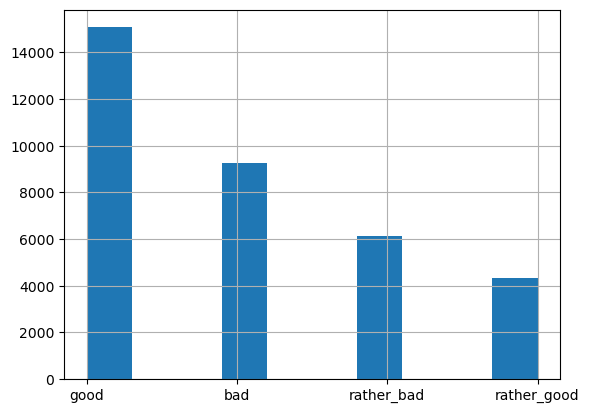

In [24]:
tdf['OUTPUT:quality'].hist()

In [28]:
SAMPLES_COUNT = 5
sample_tdf = tdf.groupby(['INPUT:dataset_name', 'OUTPUT:quality'], group_keys=False).apply(lambda x: x.sample(min(len(x), 5)))

In [29]:
sample_tdf

,INPUT:dataset_name,INPUT:model_id,INPUT:topic_id,INPUT:wordset,OUTPUT:quality,OUTPUT:topic_name,OUTPUT:bad_words
5458,20newsgroups,631ba5136d9890a069a96392,main15,price board shipping package slot hello port s...,bad,NaN,"{""price"":false,""board"":false,""shipping"":false,..."
2621,20newsgroups,631bbbf943fb92a9d1439d96,main46,moral school keith caltech animal morality hum...,bad,NaN,"{""moral"":false,""school"":false,""keith"":false,""c..."
4225,20newsgroups,631b992927e1a64b30541a0c,main10,news anonymous service usenet network internet...,bad,NaN,"{""news"":false,""anonymous"":false,""service"":fals..."
2066,20newsgroups,631b929d5a95b966a8e30347,main15,apple offer monitor sale price shipping pitt s...,bad,NaN,"{""purchase"":false,""sale"":false,""sell"":false,""m..."
3392,20newsgroups,631bb830cda35d2841a002ce,main10,anonymous news service usenet privacy network ...,bad,NaN,"{""anonymous"":false,""news"":false,""service"":fals..."
1836,20newsgroups,631b899af849c89c61879fd2,main6,disk scsi card speed controller port fast boar...,good,Computer,"{""disk"":false,""scsi"":true,""card"":false,""speed""..."
799,20newsgroups,631ba8d415ff0c23bc8b4939,main15,price apple sell offer monitor sale shipping a...,good,business,"{""price"":false,""apple"":true,""sell"":false,""offe..."
1635,20newsgroups,631bbb9a27e1a64b30544213,main32,water cold nuclear marc heat tower cool plant ...,good,energy,"{""water"":false,""cold"":false,""nuclear"":false,""m..."
614,20newsgroups,631b95e6f30064faf33e1a29,main3,drug country nazi child german anti care germa...,good,nazi's,"{""drug"":false,""country"":false,""nazi"":false,""ch..."
3522,20newsgroups,631bbb9a27e1a64b30544213,main10,news anonymous service usenet network privacy ...,good,News,"{""service"":false,""server"":false,""user"":false,""..."


In [ ]:
def evaluate_by_llm():
    for model_name, dataset_model in dataset.items():
				print (dataset_name, model_name)
				topics = dataset_model["topics"]
				human_evaluations = dataset_model["metrics"]["ratings_scores_avg"]
				i = 0
				for topic, human_eval in tqdm(zip(topics, human_evaluations), total=50):
					topic = topic[:10]
					for run in range(3):
						random.shuffle(topic)
						user_prompt = ", ".join(topic)
						if dataset_name == "wikitext":
							system_prompt = system_prompt_wikitext
						else:
							system_prompt = system_prompt_NYT
						response = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_prompt}], temperature=1.0, logit_bias={16:100, 17:100, 18:100}, max_tokens=1)["choices"][0]["message"]["content"].strip()
						out = {"dataset_name": dataset_name, "model_name": model_name, "topic_id": i, "user_prompt": user_prompt, "response": response, "human_eval":human_eval, "run": run}
						json.dump(out, outfile)
						outfile.write("\n")
						time.sleep(0.5)
					i += 1

In [31]:
stdf = sample_tdf

In [34]:
a = next(stdf.iterrows())

In [44]:
system_prompt_NYT = """
You are a helpful assistant evaluating the top words of a topic model output for a given topic. 
Please rate how related the following words are to each other on a scale from 1 to 3 ("1" = not very related, "2" = moderately related, "3" = very related). 
The topic modeling is based on The New York Times corpus. The corpus consists of articles from 1987 to 2007. Sections from a typical paper include International, National, New York Regional, Business, Technology, and Sports news; features on topics such as Dining, Movies, Travel, and Fashion; there are also obituaries and opinion pieces.
Reply with a single number, indicating the overall appropriateness of the topic.
"""

In [45]:
# result = openai.ChatCompletion.create(
#     model="gpt-3.5-turbo", 
#     messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_prompt}], 
#     temperature=1.0, 
#     logit_bias={16:100, 17:100, 18:100}, max_tokens=1
# )

# result["choices"][0]["message"]["content"].strip()

In [49]:
from openai import OpenAI

system_prompt = """
You are a helpful assistant evaluating the top words of a topic model output for a given topic. 
Please rate how related the following words are to each other on a scale from 1 to 3 ("1" = not very related, "2" = moderately related, "3" = very related). 
Reply with a single number, indicating the overall appropriateness of the topic.
"""

client = OpenAI(
    # This is the default and can be omitted
    api_key="",
)



In [163]:
system_prompt = """
You are a helpful assistant evaluating the top words of a topic model output for a given topic. 
Please rate how related the following words are to each other on a scale from 1 to 4 ("1" = poorly related, "2" = rather poorly related, "3" = rather related, "4" = very related). 
Reply with a single number, indicating the overall appropriateness of the topic.
"""

In [164]:
topic = stdf.iloc[0]['INPUT:wordset']

In [165]:
topic

'price board shipping package slot hello port sony thank unit sell purchase digital mask nubus'

In [166]:
stdf.shape

(60, 10)

In [339]:
def evaluate_llm(topic):
    user_prompt = ", ".join(topic)

    arr = []
    for i in range(5):
        chat_completion = client.chat.completions.create(
            model="gpt-4o",
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_prompt}],
            temperature=1.0,
            max_tokens=1
        )
        arr.append(chat_completion)

    return arr 

def num2score(num):
    # return 1 if num > 2 else 0
    return num

def get_metric(arr_chat_completion):
    nums = []
    for chat_completion in arr_chat_completion:
        try:
            s = chat_completion.choices[0].message.content.strip()
            num = int(s)
        except ValueError:
            warnings.warn(f"Bad number: {s}")
        nums.append(num)
    # nums = [ for chat_completion in arr_chat_completion]
    return mean(nums) 
    # return num2score(num)

def get_human_metric(x):
    name2score = {
        'good': 4,
        'rather_good': 3,
        'rather_bad': 2,
        'bad': 1
    }
    num = name2score[x]
    return num2score(num)

In [278]:
full_tdf = tdf[(tdf['INPUT:topic_id'] != 'unknown') & (~tdf['OUTPUT:quality'].isna())]
full_tdf['human_metric'] = full_tdf['OUTPUT:quality'].apply(get_human_metric)
full_tdf = full_tdf.groupby(['INPUT:model_id','INPUT:topic_id']).agg(
    human_metric=('human_metric', 'mean'),
    input_wordset=('INPUT:wordset', 'first'),
    dataset_name=('INPUT:dataset_name', 'first')
)
full_tdf = full_tdf.rename(columns={'input_wordset': 'INPUT:wordset', 'dataset_name': 'INPUT:dataset_name'}).reset_index()

/tmp/ipykernel_16742/180384493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_tdf['human_metric'] = full_tdf['OUTPUT:quality'].apply(get_human_metric)


In [283]:
full_tdf.groupby(['INPUT:dataset_name']).agg(model_counts=('INPUT:model_id', 'nunique'))

,model_counts
INPUT:dataset_name,
20newsgroups,100
amazon_food,100
lenta_ru,100


In [303]:
df = full_tdf[['INPUT:dataset_name', 'INPUT:model_id']].groupby('INPUT:dataset_name', group_keys=False).apply(lambda x: x.sample(min(len(x), 12)))

In [304]:
df.groupby(['INPUT:dataset_name']).agg(model_counts=('INPUT:model_id', 'nunique'))

,model_counts
INPUT:dataset_name,
20newsgroups,12
amazon_food,11
lenta_ru,10


In [327]:
stdf = full_tdf[full_tdf[['INPUT:dataset_name','INPUT:model_id']].agg(tuple,1).isin(df[['INPUT:dataset_name','INPUT:model_id']].agg(tuple,1))]

In [328]:
stdf.groupby(['INPUT:dataset_name']).agg(model_counts=('INPUT:model_id', 'nunique'))

,model_counts
INPUT:dataset_name,
20newsgroups,12
amazon_food,11
lenta_ru,10


In [329]:
stdf.groupby(['INPUT:dataset_name', 'INPUT:model_id']).agg(model_counts=('INPUT:topic_id', 'nunique'))

model_counts
INPUT:dataset_name INPUT:model_id                        
20newsgroups       631b887f174d83c12d0f1a8d            22
                   631b8a349a4c0179fe9f987b            22
                   631b8c83641d50abc7aa3cbb            10
                   631b9050814e124a8fb05f40            22
                   631b992927e1a64b30541a0c            28
                   631ba1dba6fa8975eb579abd            22
                   631ba4b8cda35d28419fe92f            27
                   631ba8a5963148fe573f0fcb            28
                   631bab18a79807f67e840776            28
                   631bb21d963148fe573f184d            22
                   631bb32332591f66b7e678c5            33
                   631bb42132591f66b7e67ad2            33
amazon_food        63230b74395a63a800f692d5            28
                   63230dd043fb92a9d143af7f            33
                   632311c9eef852a376dcaf74            33
                   6323199f4ac2fcd506e4c5d6            17
                   63231a98dca999f95522c8e4            17
                   63231b2715ff0c23bc8b8255            17
                   6325db66814e124a8fb0d331            28
                   6325dd002b337b5d95012d3f            28
                   63260ed179ac792348a85e87            17
                   632610e7cc299eeaf78e0711            17
                   632620474fecb0a9aa0a8534            22
lenta_ru           631b8623441f56e4790a8078            22
                   631b8646d5a4fe1912c3eb29            33
                   631b869e7668936a8be4f75a            17
                   631b87844bb36217238dc39a            33
                   631b88853cf48bd97d2c272d            33
                   631b88ec8f66b70aae934dcb            33
                   631b8a4025d962cdec4bc1f0            28
                   631b8e35a5a57837b841a9ab            22
                   631b9158ad5963ae703be71e            28
                   631b92506d9890a069a95158            17

In [330]:
stdf = stdf.groupby(['INPUT:dataset_name', 'INPUT:model_id'], group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [331]:
stdf.groupby(['INPUT:dataset_name']).agg(model_counts=('INPUT:model_id', 'nunique'))

,model_counts
INPUT:dataset_name,
20newsgroups,12
amazon_food,11
lenta_ru,10


In [332]:
stdf.groupby(['INPUT:dataset_name', 'INPUT:model_id']).agg(model_counts=('INPUT:topic_id', 'nunique'))

model_counts
INPUT:dataset_name INPUT:model_id                        
20newsgroups       631b887f174d83c12d0f1a8d            11
                   631b8a349a4c0179fe9f987b            11
                   631b8c83641d50abc7aa3cbb             5
                   631b9050814e124a8fb05f40            11
                   631b992927e1a64b30541a0c            14
                   631ba1dba6fa8975eb579abd            11
                   631ba4b8cda35d28419fe92f            14
                   631ba8a5963148fe573f0fcb            14
                   631bab18a79807f67e840776            14
                   631bb21d963148fe573f184d            11
                   631bb32332591f66b7e678c5            16
                   631bb42132591f66b7e67ad2            16
amazon_food        63230b74395a63a800f692d5            14
                   63230dd043fb92a9d143af7f            16
                   632311c9eef852a376dcaf74            16
                   6323199f4ac2fcd506e4c5d6             8
                   63231a98dca999f95522c8e4             8
                   63231b2715ff0c23bc8b8255             8
                   6325db66814e124a8fb0d331            14
                   6325dd002b337b5d95012d3f            14
                   63260ed179ac792348a85e87             8
                   632610e7cc299eeaf78e0711             8
                   632620474fecb0a9aa0a8534            11
lenta_ru           631b8623441f56e4790a8078            11
                   631b8646d5a4fe1912c3eb29            16
                   631b869e7668936a8be4f75a             8
                   631b87844bb36217238dc39a            16
                   631b88853cf48bd97d2c272d            16
                   631b88ec8f66b70aae934dcb            16
                   631b8a4025d962cdec4bc1f0            14
                   631b8e35a5a57837b841a9ab            11
                   631b9158ad5963ae703be71e            14
                   631b92506d9890a069a95158             8

In [333]:
stdf

,INPUT:model_id,INPUT:topic_id,human_metric,INPUT:wordset,INPUT:dataset_name
1114,631b887f174d83c12d0f1a8d,main3,2.4,land country care health drug disease money ha...,20newsgroups
1106,631b887f174d83c12d0f1a8d,main16,2.2,henry access appear toronto digex orbit captai...,20newsgroups
1108,631b887f174d83c12d0f1a8d,main2,3.6,player hockey season league goal leaf playoff ...,20newsgroups
1118,631b887f174d83c12d0f1a8d,main36,3.4,bike speed turn mile apple tire front simms fa...,20newsgroups
1121,631b887f174d83c12d0f1a8d,main42,3.2,center research nasa medical april health canc...,20newsgroups
...,...,...,...,...,...
2335,631b92506d9890a069a95158,main21,3.4,комитет сборная чемпионат никакой федерация со...,lenta_ru
2328,631b92506d9890a069a95158,main10,3.6,средство сумма условие деньги финансовый разме...,lenta_ru
2336,631b92506d9890a069a95158,main22,2.4,версия поступать выпускать релиз русский мероп...,lenta_ru
2334,631b92506d9890a069a95158,main20,3.0,создавать интернет позволять возможность сеть ...,lenta_ru


In [334]:
stdf['llm_score'] = stdf['INPUT:wordset'].progress_apply(evaluate_llm)

100%|██████████| 403/403 [19:17<00:00,  2.87s/it]


In [336]:
# stdf.to_csv("big_sample_4class_avg.csv")

In [341]:
stdf['llm_metric'] = stdf['llm_score'].apply(get_metric)
# stdf['human_metric'] = stdf['OUTPUT:quality'].apply(get_human_metric)

/tmp/ipykernel_16742/460180858.py:27: UserWarning: Bad number: This
  warnings.warn(f"Bad number: {s}")
/tmp/ipykernel_16742/460180858.py:27: UserWarning: Bad number: Based
  warnings.warn(f"Bad number: {s}")


In [343]:
stdf.columns

Index(['INPUT:model_id', 'INPUT:topic_id', 'human_metric', 'INPUT:wordset',
       'INPUT:dataset_name', 'llm_score', 'llm_metric'],
      dtype='object')

In [344]:
# fstdf = tdf[tdf[['INPUT:model_id','INPUT:topic_id']].agg(tuple,1).isin(stdf[['INPUT:model_id','INPUT:topic_id']].agg(tuple,1))]
# fstdf = fstdf[(fstdf['INPUT:topic_id'] != 'unknown') & (~fstdf['OUTPUT:quality'].isna())]
# fstdf['human_metric'] = fstdf['OUTPUT:quality'].apply(get_human_metric)
# fstdf = fstdf.groupby(['INPUT:model_id','INPUT:topic_id']).agg(human_metric=('human_metric', 'mean'))

In [345]:
# astdf = stdf.join(fstdf, on=['INPUT:model_id','INPUT:topic_id'], rsuffix='_right')
# astdf = astdf.drop(columns=['human_metric'])
# astdf = astdf.rename(columns={'human_metric_right': 'human_metric'})

In [351]:
df = stdf
# df = astdf

In [352]:
# df.groupby('OUTPUT:quality').agg({'llm_metric': 'mean'})

In [354]:
# df.boxplot(column=['llm_metric'], by='OUTPUT:quality')

In [355]:
df['INPUT:dataset_name'].unique()

array(['20newsgroups', 'amazon_food', 'lenta_ru'], dtype=object)

In [356]:
df[['human_metric', 'llm_metric']].corr()

,human_metric,llm_metric
human_metric,1.000000,0.737239
llm_metric,0.737239,1.000000


In [357]:

for ds_name in df['INPUT:dataset_name'].unique():
    print(f"======= {ds_name} =======")
    print(df[df['INPUT:dataset_name'] == ds_name][['human_metric', 'llm_metric']].corr())

======= 20newsgroups =======
              human_metric  llm_metric
human_metric       1.00000     0.78557
llm_metric         0.78557     1.00000
======= amazon_food =======
              human_metric  llm_metric
human_metric      1.000000    0.657408
llm_metric        0.657408    1.000000
======= lenta_ru =======
              human_metric  llm_metric
human_metric      1.000000    0.644662
llm_metric        0.644662    1.000000
